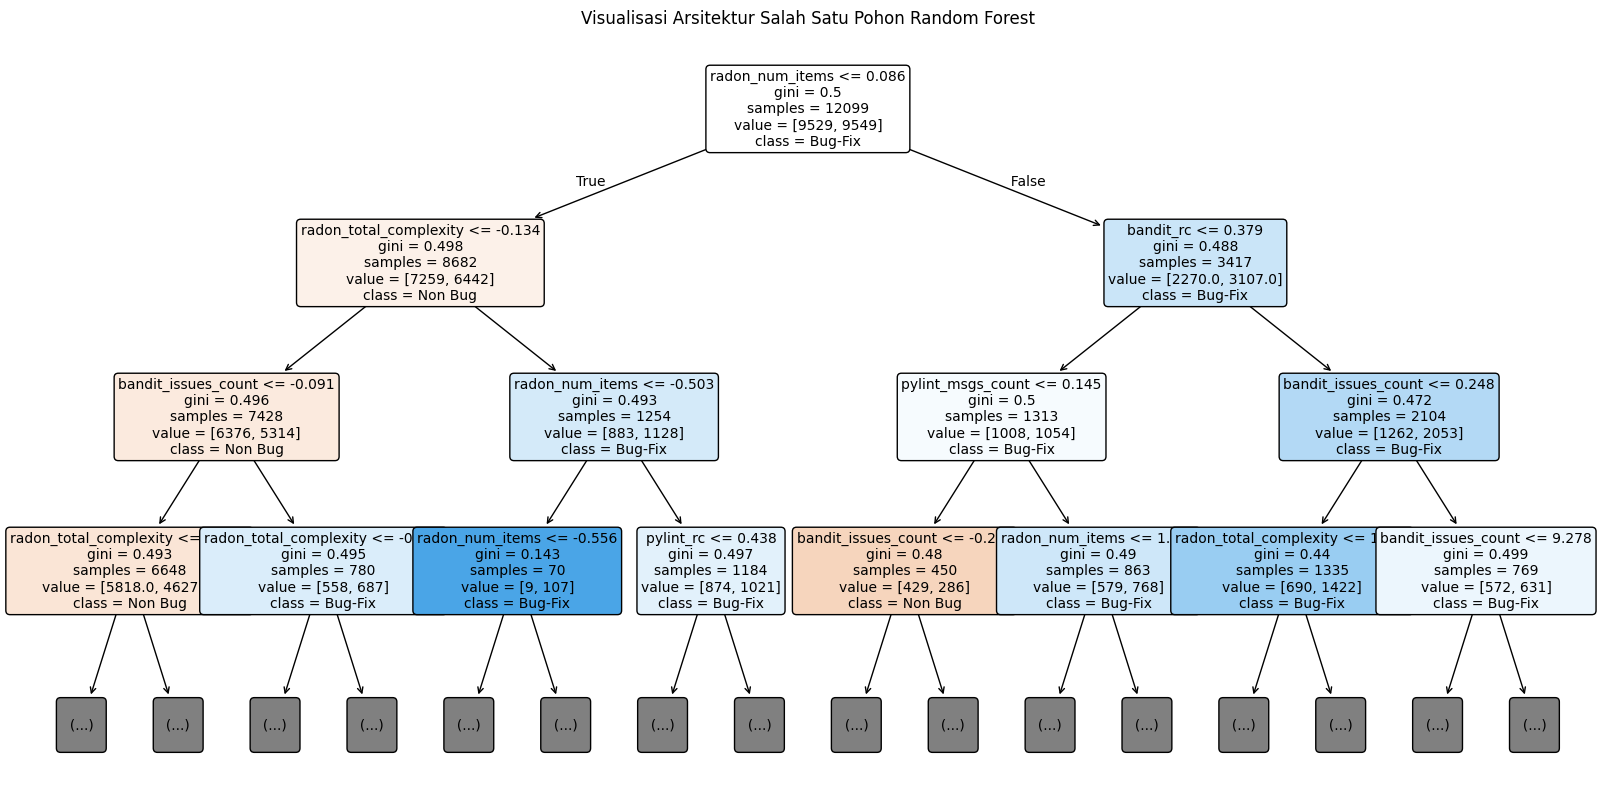

In [ ]:
# RF
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

df = pd.read_csv("ml_dataset.csv")

features = [
    "radon_total_complexity", "radon_num_items", "pylint_msgs_count",
    "pylint_rc", "bandit_issues_count", "bandit_rc"
]

X = df[features]
y = df["is_fix_like"].astype(int)

X_res, y_res = SMOTE(random_state=42).fit_resample(X, y)
X_scaled = StandardScaler().fit_transform(X_res)

rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_scaled, y_res)

plt.figure(figsize=(20, 10))
plot_tree(
    rf_model.estimators_[0],
    feature_names=features,
    class_names=["Non Bug", "Bug-Fix"],
    filled=True,
    max_depth=3,
    fontsize=10,
    rounded=True
)
plt.title("Visualisasi Arsitektur Salah Satu Pohon Random Forest")
plt.savefig("tree_visual_rf_clean.png", dpi=300, bbox_inches="tight")
plt.show()



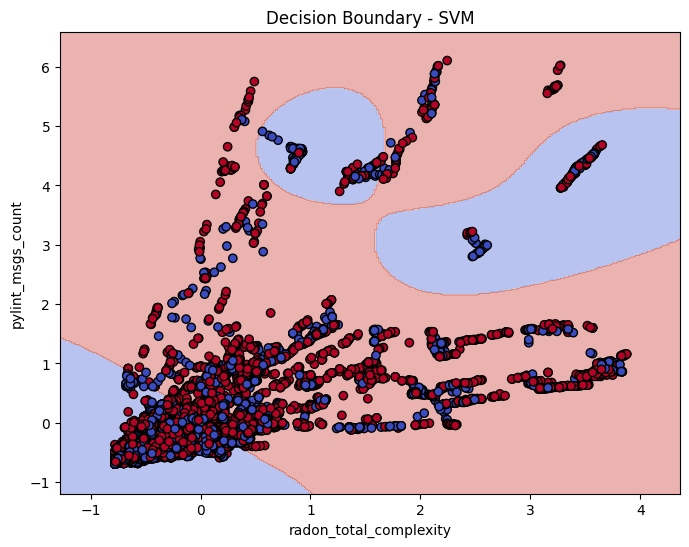

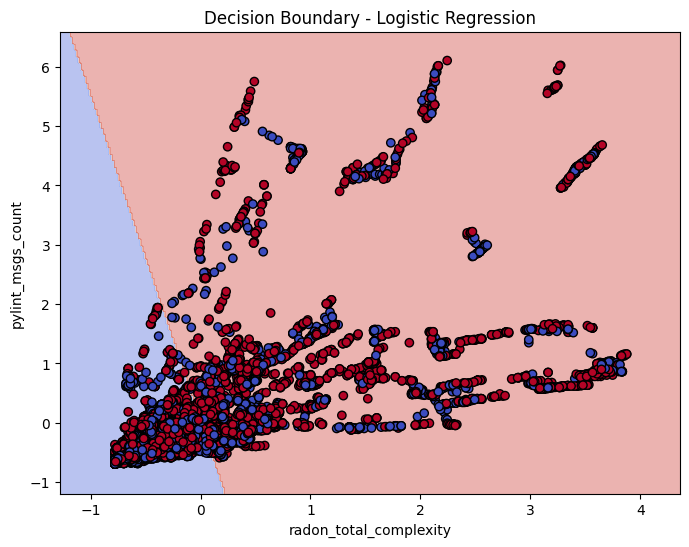

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

df = pd.read_csv("ml_dataset.csv")
features = ["radon_total_complexity", "pylint_msgs_count"]
X = df[features]
y = df["is_fix_like"].astype(int)

X_res, y_res = SMOTE(random_state=42).fit_resample(X, y)
X_scaled = StandardScaler().fit_transform(X_res)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_res, test_size=0.2, random_state=42)

svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

logreg_model = LogisticRegression(max_iter=2000)
logreg_model.fit(X_train, y_train)

def plot_decision_boundary(model, X, y, title, filename):
    h = .02
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap="coolwarm")
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", edgecolors='k')
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.title(title)
    plt.savefig(filename, dpi=300, bbox_inches="tight")
    plt.show()

plot_decision_boundary(svm_model, X_train, y_train, "Decision Boundary - SVM", "svm_boundary.png")
plot_decision_boundary(logreg_model, X_train, y_train, "Decision Boundary - Logistic Regression", "logreg_boundary.png")


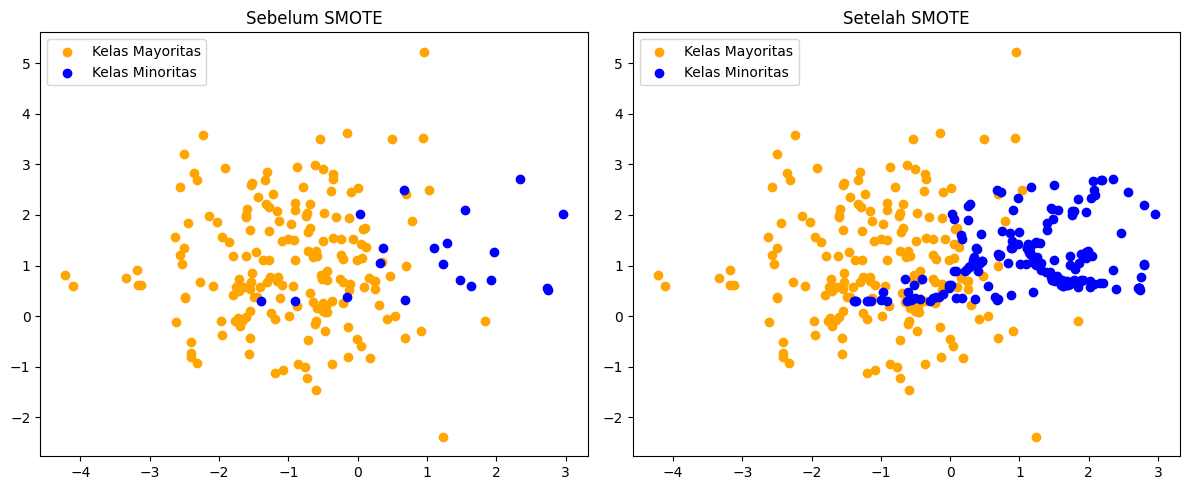

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

X, y = make_classification(
    n_samples=200, n_features=2, n_redundant=0, n_clusters_per_class=1,
    weights=[0.9, 0.1], random_state=42
)

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='orange', label='Kelas Mayoritas')
ax[0].scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='blue', label='Kelas Minoritas')
ax[0].set_title("Sebelum SMOTE")
ax[0].legend()

ax[1].scatter(X_res[y_res == 0][:, 0], X_res[y_res == 0][:, 1], c='orange', label='Kelas Mayoritas')
ax[1].scatter(X_res[y_res == 1][:, 0], X_res[y_res == 1][:, 1], c='blue', label='Kelas Minoritas')
ax[1].set_title("Setelah SMOTE")
ax[1].legend()

plt.tight_layout()
plt.savefig("smote_visual.png", dpi=300)
plt.show()
